In [1]:
from Precode import *
import numpy

data = np.load('AllSamples.npy')

In [2]:
k1,i_point1,k2,i_point2 = initial_S1('2728') # please replace 0111 with your last four digit of your ID

Strategy 1: k and initial points


In [3]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

3
[[3.53350737 0.33198894]
 [4.95728696 6.90897984]
 [5.14167285 5.71626939]]
5
[[5.07631894 3.30296197]
 [1.87131855 3.43365823]
 [5.02471033 8.23879873]
 [8.46078528 2.85204573]
 [7.68097556 0.83542043]]


In [5]:
from pandas import DataFrame
import math
import random
import sys
import matplotlib.pyplot as plt

def dist(point1, point2):
    return math.sqrt(sum((point1 - point2) ** 2))

def gen_centroids(dataset, k):
    n = dataset.shape[1]
    centroids = np.zeros((k,n))
    centroids[0][0] = dataset[random.randint(0,300)][0]
    centroids[0][1] = dataset[random.randint(0,300)][1]
    
    j = 1
    while(j < k):
        maxdist = -10000
        
        for p in range(300):
            Sum = 0
            for h in range(0,j):
                Sum = Sum + dist(dataset[p],centroids[h])

            averagedist = Sum / j
            if averagedist > maxdist:
                maxdist = averagedist
                index = p
        centroids[j,:] = dataset[index,:]
        j = j + 1
    return centroids

def kmeans(dataset, centroids, k):
    DivideCluster = np.zeros((dataset.shape[0], 2))
    ClusterChanged = True
    while ClusterChanged:
        ClusterChanged = False
        for i in range(dataset.shape[0]):
            minDist = sys.maxsize
            minIndex = 0
            for j in range(k):
                distance = dist(centroids[j], dataset[i])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            if DivideCluster[i,0] != minIndex:
                ClusterChanged = True
                DivideCluster[i,:] = minIndex, minDist
               
        for j in range(k):
            points = dataset[np.nonzero(DivideCluster[:,0] == j)[0]]
            centroids[j, :] = np.mean(points, axis = 0)
        
    return centroids, DivideCluster

def showCluster(dataset, k):
    numSamples, dim = dataset.shape
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
    plt.rcParams['figure.figsize'] = (16,9)
    for i in range(numSamples):
        markIndex = int(DivideCluster[i, 0])
        plt.plot(dataset[i, 0], dataset[i, 1], mark[markIndex])

    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], '*', markersize = 24)

    plt.show()

def get_objection(centroids, DivideCluster, k):
    Sum = 0
    for n in range(k):
        count = 0
        obj = 0
        for p in DivideCluster:
            if p[0] == n:
                obj = obj + dist(centroids[n], data[count]) ** 2
            count = count + 1
        Sum = Sum  + obj
    return Sum

for k=3
[[3.23489005 2.5530322 ]
 [4.83091958 7.29959959]
 [7.23975119 2.48208269]]
cost calculation: 1338.1076016520994


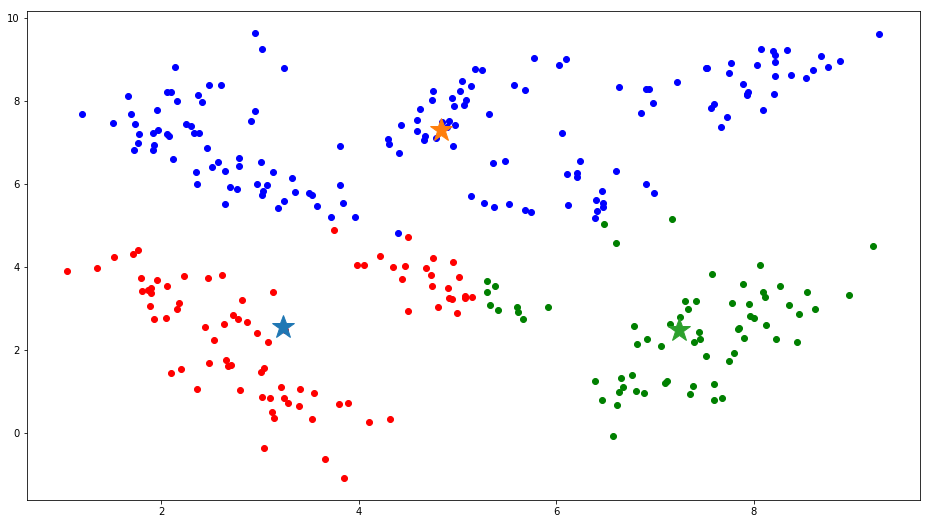


for k=5
[[3.07812639 7.08662076]
 [2.68198633 2.09461587]
 [7.1655183  8.39162215]
 [5.33907212 4.46551175]
 [7.55616782 2.23516796]]
cost calculation: 592.9375729660762


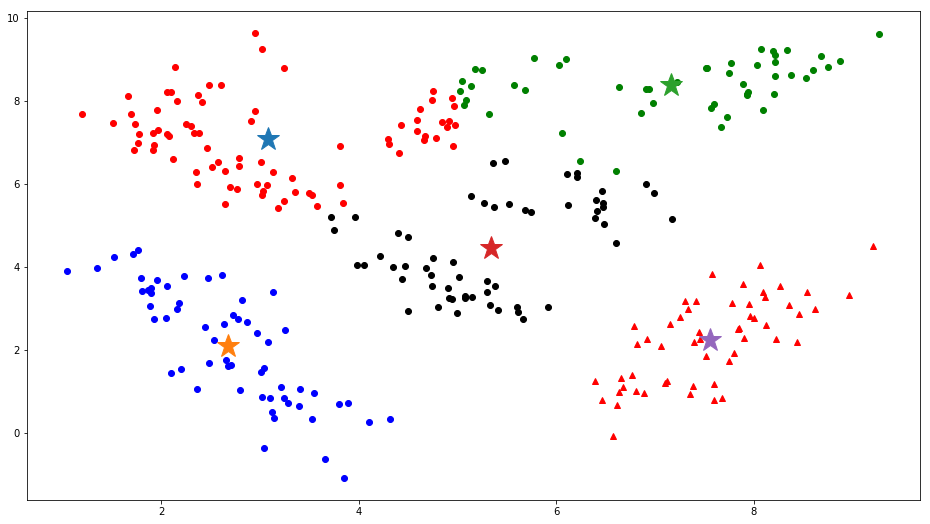

In [6]:
print('for k=3')
centroids, DivideCluster = kmeans(data, i_point1, k1)
print(centroids)
print("cost calculation:", get_objection(centroids, DivideCluster, k1))
showCluster(data, k1)

print('\nfor k=5')
centroids, DivideCluster = kmeans(data, i_point2, k2)
print(centroids)
print("cost calculation:", get_objection(centroids, DivideCluster, k2))
showCluster(data, k2)